<a href="https://colab.research.google.com/github/christievanderuit/TM10007_group11/blob/main/TM10007_Group11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=ab0eb80c6ed79408e52022b05b99f4a88ee8c76ecfb4d8fb9239ada8e8cb3b1d
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [2]:
# General packages
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn
from scipy.stats import shapiro



# Classifiers
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn import feature_selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier




In [3]:
# Some functions we will use
def colorplot(clf, ax, x, y, h=100):
    '''
    Overlay the decision areas as colors in an axes.
    
    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if len(Z.shape) > 1:
        Z = Z[:, 1]
    
    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm

In [4]:
# Run this to use from colab environment
!git clone https://github.com/jveenland/tm10007_ml.git
data = pd.read_csv('/content/tm10007_ml/worcgist/GIST_radiomicFeatures.csv', index_col=0)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

Cloning into 'tm10007_ml'...
remote: Enumerating objects: 83, done.
remote: Total 83 (delta 0), reused 0 (delta 0), pack-reused 83
Unpacking objects: 100% (83/83), 67.99 MiB | 9.18 MiB/s, done.
The number of samples: 246
The number of columns: 494


In [5]:
#zorgen dat verschillende functies uit de files aangeroepen kunnen worden 
from tm10007_ml.worcgist.load_data import *   #misschien dat dit nog op een nettere manier kan 
dataset = load_data(); 

In [6]:
#zoeken van NaN --> want duidelijk dat deze erin zitten - ook voor de nu geplotte in de eerste figuur 
x_data = data.drop("label", axis='columns')


np.where(np.asanyarray(np.isnan(x_data))) 

# # Find all entries that are not a number
x_data = x_data.apply(lambda x: pd.to_numeric(x, errors='coerce'))
nan_b = pd.isna(x_data)
n_nan = nan_b.sum().sum()
if n_nan > 0:
  nan = np.where(nan_b == "True")
else:
  nan = 0
# # Replace all NaN with 0
# x_train_nieuw = x_train.fillna(0)

#0'en zijn, dus deze droppen - dit zijn 6 kolommen 
df1 = x_data.mask(x_data != 0).dropna(axis=1)

df2 = x_data.copy()
for col in df1:
    df2 = df2.drop(col, axis=1)


In [7]:
#Splitsen in een train en in een testset 

#Waarbij x = features, y = label
y = data['label']
x = df2
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)
#AFBLIJVEN VAN TESTDATA!!! :) 





<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

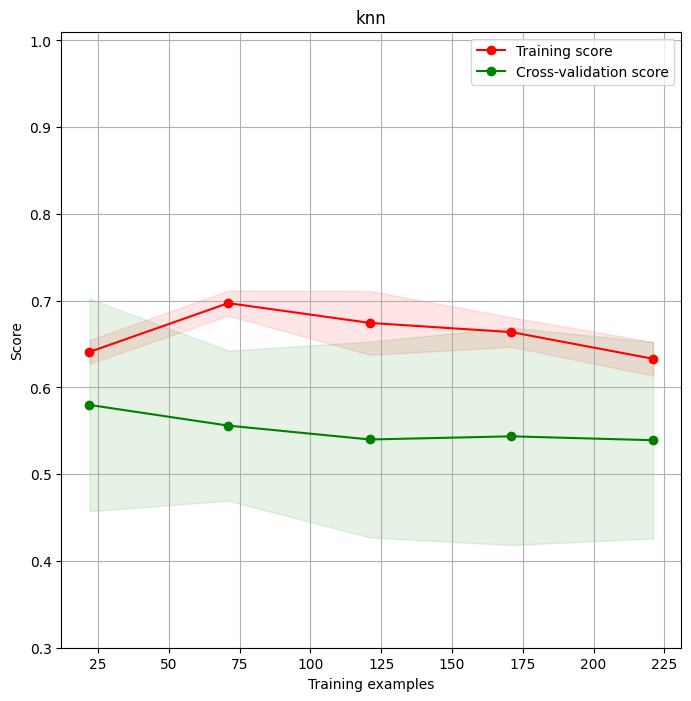

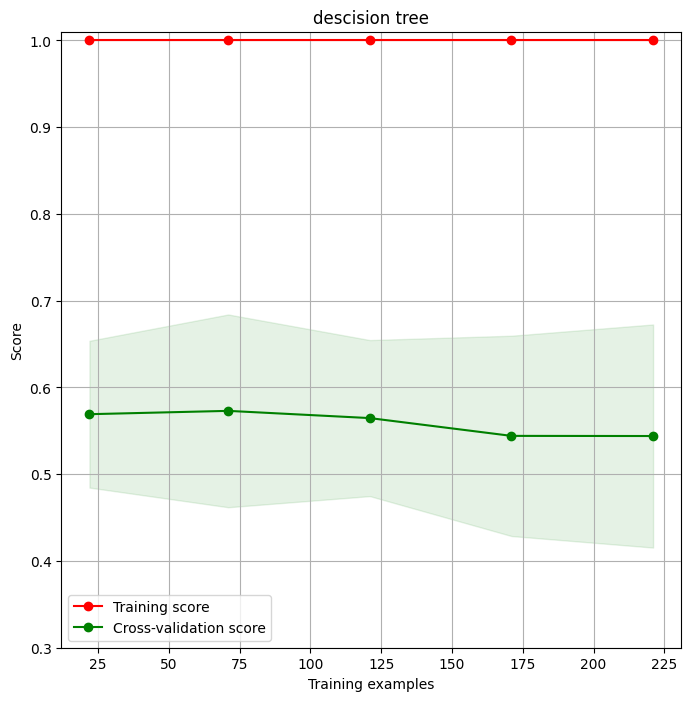

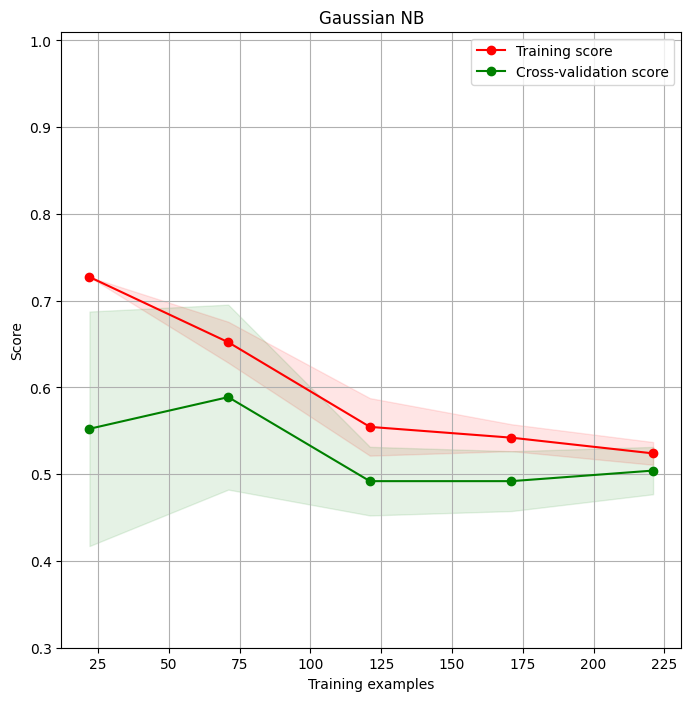

In [8]:
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores  = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

#knn gebruiken als een classifier 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1) 
clf = knn
title = "knn"
plot_learning_curve(clf, title, x, y, ax, ylim=(0.3, 1.01), cv=10)


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1) 
title = "descision tree"
plot_learning_curve(clf, title, x, y, ax, ylim=(0.3, 1.01), cv=10)


from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1) 
title = "Gaussian NB"
plot_learning_curve(clf, title, x, y, ax, ylim=(0.3, 1.01), cv=10)


In [9]:
# testen of er outliers zijn dmv LOF

lof = LocalOutlierFactor()
x_lof = lof.fit(x_train)
outlier_scores = x_lof.negative_outlier_factor_
threshold = np.mean(outlier_scores)
outliers = x_train[outlier_scores < threshold]
outlier_percentage = (len(outliers) / len(x_train)) * 100

print("Number of outliers:", len(outliers))
print("Percentage of outliers:", outlier_percentage)

Number of outliers: 9
Percentage of outliers: 4.591836734693878


In [10]:
# Test whether the data is normally distributed or not

# define a function to test for normality using the Shapiro-Wilk test
def test_normality(column):
    stat, p = shapiro(column)
    alpha = 0.05
    if p > alpha:
        return 1
    else:
        return 0

# apply the test_normality function to each column of the DataFrame
normality_results = x_train.apply(test_normality)

# print the results
print(normality_results)

# separate the data into normalized and non-normalized DataFrames using concat
normalized = pd.DataFrame()
non_normalized = pd.DataFrame()
for ind, elem in zip(x_train.columns, normality_results):
    if elem == 0:
        non_normalized = pd.concat([non_normalized, x_train[ind]], axis=1)
    else:
        normalized = pd.concat([normalized, x_train[ind]], axis=1)

# scale the non-normalized data
scaler = preprocessing.RobustScaler()
scaler.fit(non_normalized)
non_normalized = pd.DataFrame(scaler.transform(non_normalized))

# scale the normalized data
scaler_norm = preprocessing.StandardScaler()
scaler_norm.fit(normalized)
normalized = pd.DataFrame(scaler_norm.transform(normalized))

# combine the normalized and non-normalized data
scaler.fit(x_train)
x_scaled = pd.DataFrame(scaler.transform(x_train))


PREDICT_original_sf_compactness_avg_2.5D                  0
PREDICT_original_sf_compactness_std_2.5D                  0
PREDICT_original_sf_rad_dist_avg_2.5D                     0
PREDICT_original_sf_rad_dist_std_2.5D                     0
PREDICT_original_sf_roughness_avg_2.5D                    0
                                                         ..
PREDICT_original_phasef_phasesym_kurtosis_WL3_N5          0
PREDICT_original_phasef_phasesym_range_WL3_N5             0
PREDICT_original_phasef_phasesym_energy_WL3_N5            0
PREDICT_original_phasef_phasesym_quartile_range_WL3_N5    0
PREDICT_original_phasef_phasesym_entropy_WL3_N5           1
Length: 487, dtype: int64


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


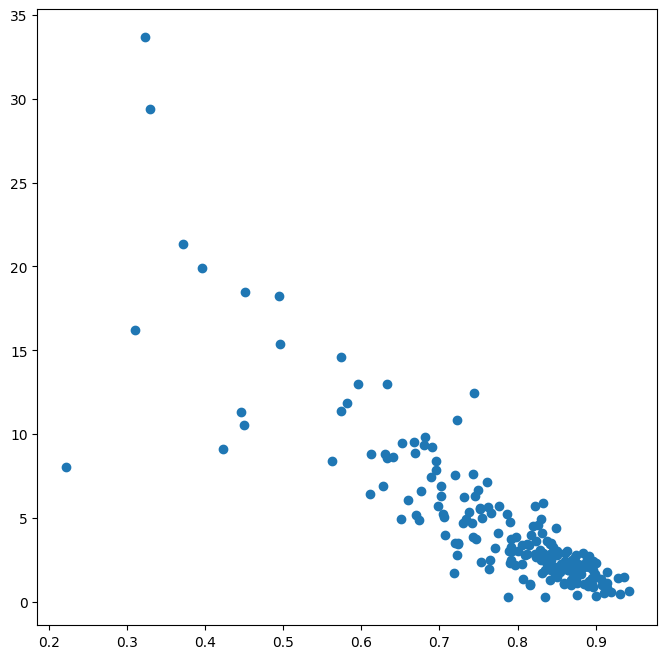

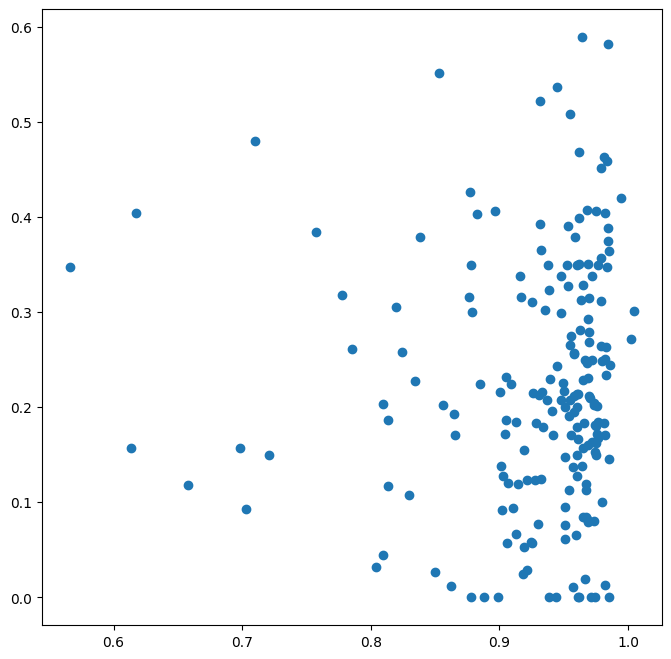

In [11]:
#plotten 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x_train['PREDICT_original_sf_compactness_avg_2.5D'], x_train['PREDICT_original_sf_roughness_std_2.5D'])

#Testen met een andere variabele 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x_train['PREDICT_original_sf_convexity_avg_2.5D'], x_train['PREDICT_original_phasef_phasesym_range_WL3_N5'])


In [12]:
# Attempt at PCA

def pca_func(X,n):
  # create PCA object with 2 components
  pca = PCA(n_components=n)

  # fit and transform the data
  df_pca = pca.fit_transform(X)
  return df_pca

In [13]:

def kbest_func(X, k):
    """
    Select the top k features using the f_regression score as the evaluation metric
    """
    # define the feature selector
    selector = SelectKBest(f_classif, k=k)
    
    # fit the selector to the training data and transform the data
    x_train_kbest = selector.fit_transform(X, y_train)
    return x_train_kbest

In [14]:
def rfe_func(X,k): 
    # Create a LabelEncoder object 
    le = LabelEncoder()

    # Fit the LabelEncoder object on the target variable (dit wordt gedaan omdat y_train uit alleen maar strings bestaat en dan kan je niet RFE gebruiken)
    y_train_encoded = le.fit_transform(y_train)

    # Create a logistic regression object
    lr = LinearRegression()

    # Create an RFE object and fit it on the training data
    rfe = RFE(estimator=lr, n_features_to_select=k)
    x_train_rfe = rfe.fit_transform(X, y_train_encoded)
    return x_train_rfe

In [15]:
# L1 regularization (Lasso regression)

def lasso_func(X,k):   
    # Create a LabelEncoder object
    le = LabelEncoder()

    # Fit the LabelEncoder object on the target variable
    y_train_encoded = le.fit_transform(y_train)

    # Lasso regression
    lasso = Lasso(alpha=k)
    
    # Create a SelectFromModel object and fit it on the training data
    selector = SelectFromModel(estimator=lasso)
    selector.fit(X, y_train_encoded)

    # Use the selector object to transform the data
    x_train_lasso = selector.transform(X)
    return x_train_lasso

In [16]:
# SVM with cross vallidation

n = 50
x_pca = pca_func(x_scaled,n)

y_gist = pd.Series([1 if label == "GIST" else 0 for label in y_train], index=y_train.index)


# Create a linear SVM object
svm = LinearSVC(max_iter=1000)

# Perform 5-fold cross-validation on the training data
scores = cross_val_score(svm, x_pca, y_gist, cv=50)

# Print the average accuracy and standard deviation of the cross-validation scores
print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Accuracy: 47.17% (+/- 11.26%)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [17]:
# KNN poging - PCA


n = 50
x_pca = pca_func(x_scaled,n)

# Assume X_train, y_train are numpy arrays or pandas dataframes
# Create a k-NN classifier object with k=5
knn = KNeighborsClassifier(n_neighbors=9)

# Use 5-fold cross-validation to evaluate the performance of the k-NN classifier on the training set
scores = cross_val_score(knn, x_pca, y_gist, cv=100)

# Print the cross-validation scores and their mean
print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 96 members, which is less than n_splits=100.
  warnings.warn(


Accuracy: 48.00% (+/- 36.69%)


In [18]:
# KNN poging - selectKBest

k = 100
x_kbest = kbest_func(x_scaled,k)

# Assume X_train, y_train are numpy arrays or pandas dataframes
# Create a k-NN classifier object with k=5
knn = KNeighborsClassifier(n_neighbors=9)

# Use 5-fold cross-validation to evaluate the performance of the k-NN classifier on the training set
knn_select_scores = cross_val_score(knn, x_kbest, y_gist, cv=100)

# Print the cross-validation scores and their mean
print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 77  83  84  90  97 103 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 96 members, which is less than n_splits=100.
  warnings.warn(


Accuracy: 48.00% (+/- 36.69%)


In [19]:
# KNN poging - RFE

k = 100
x_rfe = rfe_func(x_scaled,k)

# Assume X_train, y_train are numpy arrays or pandas dataframes
# Create a k-NN classifier object with k=5
knn = KNeighborsClassifier(n_neighbors=9)

# Use 5-fold cross-validation to evaluate the performance of the k-NN classifier on the training set
scores = cross_val_score(knn, x_rfe, y_gist, cv=100)

# Print the cross-validation scores and their mean
print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 96 members, which is less than n_splits=100.
  warnings.warn(


Accuracy: 59.00% (+/- 33.45%)


In [20]:
# KNN poging - lasso

k = 0.099
x_lasso = lasso_func(x_scaled, k)

# Assume X_train, y_train are numpy arrays or pandas dataframes
# Create a k-NN classifier object with k=5
knn = KNeighborsClassifier(n_neighbors=9)

# Use 5-fold cross-validation to evaluate the performance of the k-NN classifier on the training set
scores = cross_val_score(knn, x_lasso, y_gist, cv=100)

# Print the cross-validation scores and their mean
print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 96 members, which is less than n_splits=100.
  warnings.warn(


Accuracy: 60.50% (+/- 35.56%)


In [21]:
# Non linear SVM - PCA

n = 100
x_pca = pca_func(x_scaled,n)

# Train non-linear SVM with cross-validation
clf = SVC(kernel='poly',degree=3, C=1.0)
scores = cross_val_score(clf, x_pca, y_train, cv=100)

# Print cross-validation scores
print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 96 members, which is less than n_splits=100.
  warnings.warn(


Accuracy: 52.00% (+/- 12.08%)


In [22]:
# Non linear SVM - SelectKBest

k = 100
x_kbest = kbest_func(x_scaled,k)

# Train non-linear SVM with cross-validation
clf = SVC(kernel='poly',degree=3, C=1.0)
scores = cross_val_score(clf, x_kbest, y_train, cv=100)

# Print cross-validation scores
print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 77  83  84  90  97 103 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 96 members, which is less than n_splits=100.
  warnings.warn(


Accuracy: 54.50% (+/- 23.55%)


In [23]:
# Non linear SVM - RFE

k = 100
x_rfe = rfe_func(x_scaled,k)

# Train non-linear SVM with cross-validation
clf = SVC(kernel='poly',degree=3, C=1.0)
scores = cross_val_score(clf, x_rfe, y_train, cv=100)

# Print cross-validation scores
print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 96 members, which is less than n_splits=100.
  warnings.warn(


Accuracy: 50.50% (+/- 29.58%)


In [24]:
# Non linear SVM - Lasso

k = 0.01
x_lasso = lasso_func(x_scaled,k)

# Train non-linear SVM with cross-validation
clf = SVC(kernel='poly',degree=3, C=1.0)
scores = cross_val_score(clf, x_lasso, y_train, cv=100)

# Print cross-validation scores
print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.106e+01, tolerance: 4.898e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 96 members, which is less than n_splits=100.
  warnings.warn(


Accuracy: 52.00% (+/- 12.08%)


In [25]:
# RandomForest ensemble with cross_val - selectKBest

k = 100
x_kbest = kbest_func(x_scaled,k)

params = {'n_estimators': [1, 2, 5, 10, 20, 30, 40, 50, 100]}

# Run grid search with 50 fold cross validation on forest classifier
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=50)
grid = grid.fit(x_kbest, y_train)

print(grid.cv_results_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 77  83  84  90  97 103 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


{'mean_fit_time': array([0.0028871 , 0.004695  , 0.01023676, 0.02077806, 0.03779337,
       0.06486024, 0.07442966, 0.09103892, 0.19138161]), 'std_fit_time': array([0.00048239, 0.00057141, 0.00103613, 0.01053426, 0.0019559 ,
       0.00967263, 0.0030596 , 0.00282168, 0.02254602]), 'mean_score_time': array([0.00085244, 0.00097817, 0.00121762, 0.00166949, 0.0025677 ,
       0.00383477, 0.00413829, 0.00496564, 0.00943436]), 'std_score_time': array([9.68408372e-05, 1.78515723e-04, 1.23676166e-04, 1.47064075e-04,
       4.22719250e-04, 8.63995887e-04, 2.60217001e-04, 5.90433993e-04,
       1.10507611e-03]), 'param_n_estimators': masked_array(data=[1, 2, 5, 10, 20, 30, 40, 50, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 1}, {'n_estimators': 2}, {'n_estimators': 5}, {'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 30}, {'n_estimators': 40}, 

In [26]:
# Random forest ensemble with bagging - SelectKBest

k = 100
x_kbest = kbest_func(x_scaled,k)

# Assume X_train, y_train are numpy arrays or pandas dataframes

# Create a Random Forest classifier object with n=100 as the base estimator
base_estimator = RandomForestClassifier(n_estimators=100)

# Create a BaggingClassifier with the Random Forest classifier as the base estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator)  # Use "estimator" instead of "base_estimator"

# Use 5-fold cross-validation to evaluate the performance of the BaggingClassifier on the training set
scores = cross_val_score(bagging_classifier, x_kbest, y_train, cv=5)

# Print the cross-validation scores and their mean
print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

# Perform GridSearchCV with BaggingClassifier
params = {'estimator__n_estimators': [1, 2, 5, 10, 20, 30, 40, 50, 100]} # Use "estimator" instead of "base_estimator"
cv = StratifiedKFold(n_splits=50) # Use StratifiedKFold for cross-validation
grid = GridSearchCV(estimator=bagging_classifier, param_grid=params, cv=cv)
grid.fit(x_kbest, y_train)

# Print the results of grid search
print(grid.cv_results_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 77  83  84  90  97 103 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy: 64.81% (+/- 6.69%)
{'mean_fit_time': array([0.0317568 , 0.04775093, 0.10428454, 0.17651612, 0.33512663,
       0.51633426, 0.65811024, 0.81861664, 1.61580748]), 'std_fit_time': array([0.00140303, 0.00164775, 0.01714252, 0.0206612 , 0.03692122,
       0.09496899, 0.06737123, 0.08814496, 0.11622631]), 'mean_score_time': array([0.003847  , 0.00483259, 0.00817358, 0.01177178, 0.02007089,
       0.03106593, 0.03771801, 0.04731277, 0.09632954]), 'std_score_time': array([0.00052958, 0.00072298, 0.00139075, 0.00182444, 0.00257824,
       0.01227545, 0.00515513, 0.00608249, 0.01360859]), 'param_estimator__n_estimators': masked_array(data=[1, 2, 5, 10, 20, 30, 40, 50, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'estimator__n_estimators': 1}, {'estimator__n_estimators': 2}, {'estimator__n_estimators': 5}, {'estimator__n_estimators': 10}, {'estimator__n_estimators

In [27]:
# Non linear SVM with KNN - SelectKBest (cross_val)

# SelectKBest feature selection
k = 100
x_kbest = kbest_func(x_scaled, k)

# Train non-linear SVM with cross-validation
svm = SVC(kernel='poly', degree=3, C=1.0)
svm_scores = cross_val_score(svm, x_kbest, y_train, cv=100)

# Train KNN with cross-validation
knn = KNeighborsClassifier(n_neighbors=9)
knn_scores = cross_val_score(knn, x_kbest, y_gist, cv=100)

# Ensemble by averaging the scores
ensemble_scores = (svm_scores + knn_scores) / 2

# Print the cross-validation scores and their mean for SVM, KNN, and the ensemble
print("SVM Accuracy: {:.2f}% (+/- {:.2f}%)".format(svm_scores.mean()*100, svm_scores.std()*100))
print("KNN Accuracy: {:.2f}% (+/- {:.2f}%)".format(knn_scores.mean()*100, knn_scores.std()*100))
print("Ensemble Accuracy: {:.2f}% (+/- {:.2f}%)".format(ensemble_scores.mean()*100, ensemble_scores.std()*100))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 77  83  84  90  97 103 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 96 members, which is less than n_splits=100.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 96 members, which is less than n_splits=100.
  warnings.warn(


SVM Accuracy: 54.50% (+/- 23.55%)
KNN Accuracy: 61.00% (+/- 36.46%)
Ensemble Accuracy: 57.75% (+/- 24.92%)


In [28]:
# non-linear SVM and KNN - SelectKbest with bagging

# SelectKBest feature selection
k = 100
x_kbest = kbest_func(x_scaled, k)

# Train non-linear SVM with cross-validation
svm = SVC(kernel='poly', degree=3, C=1.0)
# Train KNN with cross-validation
knn = KNeighborsClassifier(n_neighbors=9)

# Create an ensemble of SVM and KNN classifiers using bagging
ensemble_svm = BaggingClassifier(base_estimator=svm, n_estimators=10, random_state=42)
ensemble_knn = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)

# Compute cross-validation scores for the ensemble classifiers with 5-fold cross-validation
svm_scores = cross_val_score(ensemble_svm, x_kbest, y_train, cv=5)
knn_scores = cross_val_score(ensemble_knn, x_kbest, y_gist, cv=5)

# Ensemble by averaging the scores
ensemble_scores_averaging = (svm_scores + knn_scores) / 2

# Create an ensemble with voting
ensemble_voting = VotingClassifier(estimators=[('svm', ensemble_svm), ('knn', ensemble_knn)], voting='hard')

# Compute cross-validation scores for the ensemble classifiers with 5-fold cross-validation
ensemble_scores_voting = cross_val_score(ensemble_voting, x_kbest, y_train, cv=5)

# Print the cross-validation scores and their mean for SVM, KNN, and the ensemble averaging
print("SVM Accuracy: {:.2f}% (+/- {:.2f}%)".format(svm_scores.mean()*100, svm_scores.std()*100))
print("KNN Accuracy: {:.2f}% (+/- {:.2f}%)".format(knn_scores.mean()*100, knn_scores.std()*100))
print("Ensemble Accuracy averaging: {:.2f}% (+/- {:.2f}%)".format(ensemble_scores_averaging.mean()*100, ensemble_scores_averaging.std()*100))

# Print the cross-validation scores and their mean for the ensemble voting 
print("Ensemble Accuracy voting: {:.2f}% (+/- {:.2f}%)".format(ensemble_scores_voting.mean()*100, ensemble_scores_voting.std()*100))


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 77  83  84  90  97 103 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3

SVM Accuracy: 54.60% (+/- 3.60%)
KNN Accuracy: 61.77% (+/- 5.55%)
Ensemble Accuracy averaging: 58.19% (+/- 3.88%)
Ensemble Accuracy voting: 61.77% (+/- 5.55%)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [29]:


# SelectKBest feature selection
k = 100
x_kbest = kbest_func(x_scaled, k)

# Train non-linear SVM with cross-validation
svm = SVC(kernel='poly', degree=3, C=1.0)
# Train linear SVM with SelectKBest feature selection
linear_svm = SelectKBest(k=k).fit_transform(x_scaled, y_train)
linear_svm = LinearSVC()

# Train KNN with cross-validation
knn = KNeighborsClassifier(n_neighbors=9)

# Create an ensemble of SVM, Linear SVM, and KNN classifiers using bagging
ensemble_svm = BaggingClassifier(base_estimator=svm, n_estimators=10, random_state=42)
ensemble_linear_svm = BaggingClassifier(base_estimator=linear_svm, n_estimators=10, random_state=42)
ensemble_knn = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)

# Compute cross-validation scores for the ensemble classifiers with 5-fold cross-validation
svm_scores = cross_val_score(ensemble_svm, x_kbest, y_train, cv=5)
linear_svm_scores = cross_val_score(ensemble_linear_svm, x_kbest, y_train, cv=5)
knn_scores = cross_val_score(ensemble_knn, x_kbest, y_train, cv=5)

# Create an ensemble with voting
ensemble_voting = VotingClassifier(estimators=[('svm', ensemble_svm), ('linear_svm', ensemble_linear_svm), ('knn', ensemble_knn)], voting='hard')

# Compute cross-validation scores for the ensemble classifiers with 5-fold cross-validation
ensemble_scores_voting = cross_val_score(ensemble_voting, x_kbest, y_train, cv=5)

# Print the cross-validation scores and their mean for SVM, Linear SVM, KNN, and the ensemble averaging
print("SVM Accuracy: {:.2f}% (+/- {:.2f}%)".format(svm_scores.mean()*100, svm_scores.std()*100))
print("Linear SVM Accuracy: {:.2f}% (+/- {:.2f}%)".format(linear_svm_scores.mean()*100, linear_svm_scores.std()*100))
print("KNN Accuracy: {:.2f}% (+/- {:.2f}%)".format(knn_scores.mean()*100, knn_scores.std()*100))
print("Ensemble Accuracy averaging: {:.2f}% (+/- {:.2f}%)".format(ensemble_scores_voting.mean()*100, ensemble_scores_voting.std()*100))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 77  83  84  90  97 103 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 77  83  84  90  97 103 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warn

SVM Accuracy: 54.60% (+/- 3.60%)
Linear SVM Accuracy: 59.17% (+/- 5.94%)
KNN Accuracy: 61.77% (+/- 5.55%)
Ensemble Accuracy averaging: 61.76% (+/- 6.53%)


In [30]:
# Random forrest attempt Harmen

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100)

# Fit the random forest classifier on the training data
rfc.fit(x_scaled, y_train)

# Evaluate the random forest classifier on the testing data
scores = cross_val_score(rfc, x_scaled, y_train, cv=10)

print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*100))

Accuracy: 58.71% (+/- 5.46%)


In [31]:
# Random forrest with grid search Harmen

# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [5, 10, 15, 20, 50, None],
    'min_samples_split': [2, 5, 10, 20, 50]
}

# Create a grid search object with the RandomForestClassifier and hyperparameter grid
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(x_scaled, y_train)

# Print the best hyperparameters and the corresponding score on the validation set
print("Best hyperparameters:", grid_search.best_params_)
print("Validation set score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2}
Validation set score: 0.6379487179487179


In [32]:
# ROC first attempt Christie
from sklearn.metrics import RocCurveDisplay

# gebruik maken van de KNN poging met selectKbest
RocCurveDisplay.from_estimator(knn_select_scores, x_kbest, y_train)
plt.show() 

ValueError: ignored

In [41]:
# ROC second attempt Christie
from sklearn.metrics import roc_curve
# Assuming you have already trained and predicted using your classification model
y_pred = knn_select_scores.predict_proba(x_kbest)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

AttributeError: ignored

In [ ]:
# #Evaluatie van het model uiteindelijk met outer cross validatie 
# from sklearn.model_selection import KFold 
# from sklearn.metrics import accuracy_score 

# #dit moet helemaal bovenaan de code 
# from sklearn.model_selection import train_test_split, KFold, GridSearchCV 

# y = data['label']
# x = df2
# # Define outer cross-validation
# outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
# outer_scores = []

# for train_index, test_index in outer_cv.split(x):
#     # Split data into outer training and test sets
#     X_train_outer, X_test = x[train_index], x[test_index] # dit zorgt ervoor dat hij hem splitst in outer in een train en test set 
#     y_train_outer, y_test = y[train_index], y[test_index]

#     # Define inner cross-validation
#     inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
#     inner_scores = []

#     for inner_train_index, inner_test_index in inner_cv.split(X_train_outer):
#         # Split data into inner training and validation sets      --> hier moet de code komen die we al hebben met de juiste classifier --> kunnen het makkelijk maken door hier gewoon de nieuwe classifier in te plakkken, wel beetje omslachtig maar wel t makkelijkste 
#         X_train_inner, X_val = X_train_outer[inner_train_index], X_train_outer[inner_test_index]
#         y_train_inner, y_val = y_train_outer[inner_train_index], y_train_outer[inner_test_index]

#         # Split inner training set into training and validation sets
#         X_train, X_test_inner, y_train, y_test_inner = train_test_split(X_train_inner, y_train_inner, test_size=0.2, random_state=42)

# # hier komt ons model + scaling en feature selectie 
       
#        #LET OP HIER MOET DE JUISTE SCALING WORDEN AANGEPAST 
#         # scale data
#         scaler = preprocessing.RobustScaler()
#         scaler.fit(x_train)
#         x_scaled = pd.DataFrame(scaler.transform(non_normalized))


#       #HIER MOET DE CODE KOMEN DIE UITEINDELIJK GEKOZEN IS VOOR DE CLASSIFIER 
#         # Evaluate model on inner validation set
#         inner_score = grid_search.score(X_val, y_val)
#         inner_scores.append(inner_score)

#     # Train model on outer training set with best hyperparameters
#     best_params = grid_search.best_params_
#     model = SVC(**best_params)
#     model.fit(X_train_outer, y_train_outer)

#     # Evaluate model on outer test set
#     outer_score = model.score(X_test, y_test)
#     outer_scores.append(outer_score)

# # Print average outer cross-validation score
# print('Outer CV score:', np.mean(outer_scores))

In [ ]:
#